## 3.5 聚类
聚类(clustering)是将数据集划分成组的任务，这些组叫作簇(cluster)。其目标是划分数据，使得一个簇内的数据点非常相似且不同簇内的数据点非常不同。与分类算法类似，聚类算法为每个数据点分配(或预测)一个数字，表示这个点属于哪个簇。

### 3.5.1 kMeans聚类
kMeans聚类是最简单也最常用的聚类算法之一。它试图找到代表数据特定区域的簇中心(cluster center)。算法交替执行以下两个步骤：将每个数据点分配给最近的簇中心，然后将每个簇中心设置为所分配的所有数据点的平均值。如果簇的分配不再发生变化，那么算法结束。`图3-23`是在一个模拟数据集上对这一算法进行说明：

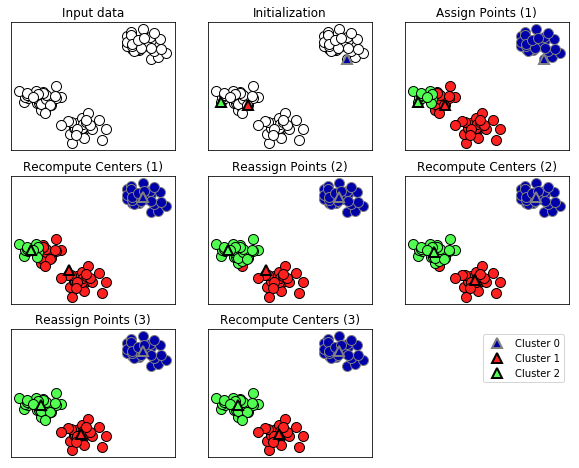

In [1]:
import matplotlib.pyplot as plt
import mglearn

mglearn.plots.plot_kmeans_algorithm()
plt.show()

簇中心用三角形表示，而数据点用圆形表示。颜色表示簇成员。我们指定要寻找三个簇，所以通过声明三个随机数据点为簇中心来将算法初始化。然后开始迭代算法。首先，每个数据点被分配给距离最近的簇中心。接下来，将簇中心修改为所分配点的平均值。然后将这一过程再重复两次。在第三次迭代之后，为簇中心分配的数据点保持不变，因此算法结束。

给定新的数据点，kMeans会将其分配给最近的簇中心。`图3-24`展示了`图3-23`学到的簇中心的边界：

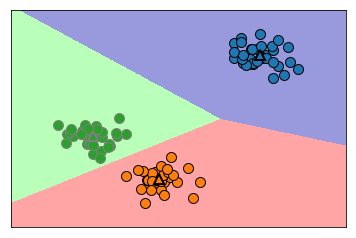

In [2]:
mglearn.plots.plot_kmeans_boundaries()
plt.show()

下面我们将其应用于上图中的模拟数据测试`scikit-learning`的`KMeans类`，并设置我们要寻找的簇个数3，然后对数据调用`fit方法`。如果不指定`n_clusters`，它的默认值是8。使用这个值并没有什么特别的原因。

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成模拟的二维数据
X, y = make_blobs(random_state=1)

# 构建聚类模型
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# 算法为X中的每个训练数据点分配一个簇标签，存储在kmeans.labels_属性中
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


`predict`方法为新数据点分配簇标签。预测时会将最近的簇中心分配给每个新数据点，但现有模型不会改变：

In [4]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


聚类算法与分类算法有些相似，每个元素都有一个标签，但并不存在真实的标签，因此标签本身并没有先验意义。

下面又给出了这个数据的图像(`图3-25`)。簇中心被保存在`cluster_centers_`属性中，我们用三角形表示它们：

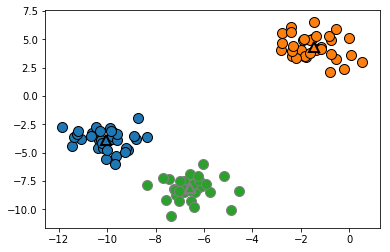

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show()

我们也可以使用更多或更少的簇中心(`图3-26`)：

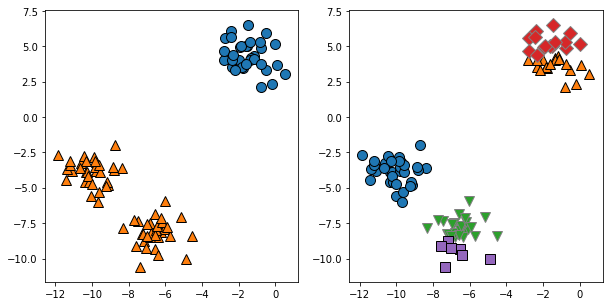

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 使用2个簇中心：
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 使用5个簇中心：
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

plt.show()

#### 3.5.1.1 kMeans的失败案例
即使你知道给定数据集中簇的“正确”个数，kMeans也不是总能找到它们。每个簇仅由其中心定义，这意味着每个簇都是凸形(convex)。因此，kMeans只能找到相对简单的形状。kMeans还假设所有簇在某种程度上具有相同的“直径”，它总是将簇之间的边界刚好画在簇中心的中间位置。有时这会导致令人惊讶的结果，如`图3-27`所示：

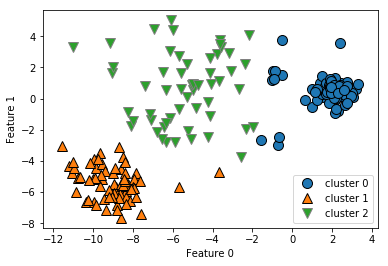

In [7]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

你可能会认为左下方的密集区域是第一个簇，右上方的密集区域是第二个，中间密度较小的区域是第三个。但事实上，簇0和簇1都包含一些远离簇中其他点的点。

kMeans还假设所有方向对每个簇都同等重要。`图3-28`显示了一个二维数据集，数据中包含明确分开的三部分。但是这三部分被沿着对角线方向拉长。由于kMeans仅考虑到最近簇中心的距离，所以它无法处理这种类型的数据：

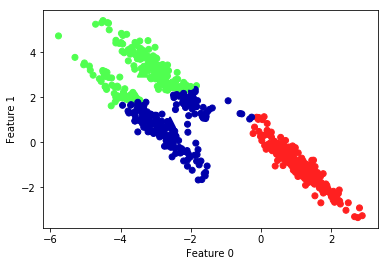

In [8]:
import numpy as np

# 生成一些随机分组数据
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 变换数据使其拉长
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 将数据聚类成3个簇
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 画出簇分配和簇中心
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

如果簇的形状更加复杂，比如`two_moons数据`，那么kMeans的表现也很差(见`图3-29`)，这里我们希望聚类算法能够发现两个半月形，但利用kMeans是不可能做到这一点的：

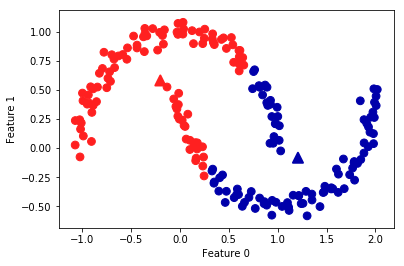

In [9]:
# 生成模拟的two_moons数据（这次的噪声较小）
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据聚类成2个簇
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 画出簇分配和簇中心
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

#### 3.5.1.2 矢量量化，或者将kMeans看作分解
虽然kMeans是一种聚类算法，但在它和分解方法(比如PCA和NMF)之间存在一些有趣的相似之处。

PCA试图找到数据中方差最大的方向，而NMF试图找到累加的分量，这通常对应于数据的“极值”或“部分”(见`图3-13`)。两种方法都试图将数据点表示为一些分量之和。与之相反，kMeans则尝试利用簇中心来表示每个数据点。你可以将其看作仅用一个分量来表示每个数据点，该分量由簇中心给出。这种观点将kMeans看作是一种分解方法，其中每个点用单一分量来表示，这种观点被称为矢量量化(vector quantization)。

我们比较PCA、NMF和kMeans，分别显示提取的分量(`图3-30`)，以及利用100个分量对测试集中人脸的重建(`图3-31`)。对于kMeans，重建就是在训练集中找到的最近的簇中心：

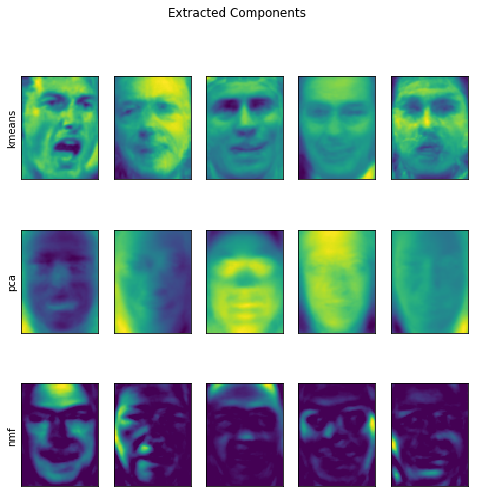

In [10]:
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

# to make the data less skewed, we will only take up to 50 
# images of each person
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

# trained by PCA/NMF/kMeans
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

image_shape = people.images[0].shape

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

plt.show()

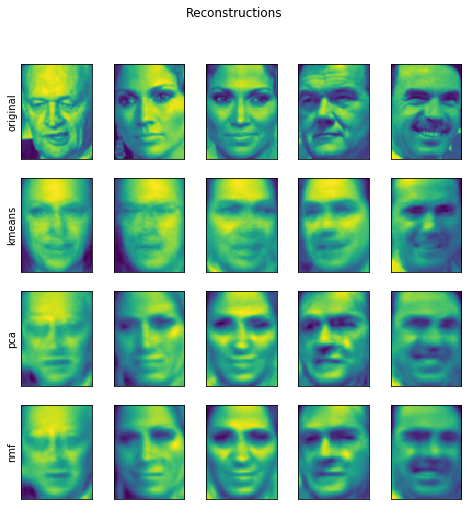

In [11]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()

利用kMeans做矢量量化的一个有趣之处在于，可以用比输入维度更多的簇来对数据进行编码。让我们回到`two_moons数据`。利用PCA或NMF，我们对这个数据无能为力，因为它只有两个维度。使用PCA或NMF将其降到一维，将会完全破坏数据的结构。但通过使用更多的簇中心，我们可以用kMeans找到一种更具表现力的表示(见`图3-32`)：

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


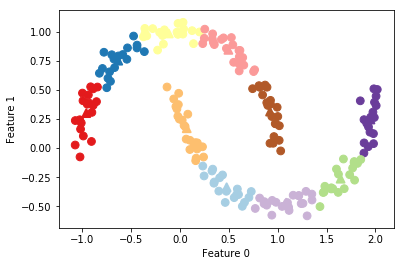

In [12]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))
plt.show()

现在每个点都被分配了0到9之间的一个数字。我们可以将其看作10个分量表示的数据，只有表示该点对应的簇中心的那个特征不为0，其他特征均为0。利用这个10维表示，现在可以用线性模型来划分两个半月形，而利用原始的两个特征是不可能做到这一点的。将到每个簇中心的距离作为特征，还可以得到一种表现力更强的数据表示。可以利用`kmeans`的`transform方法`来完成这一点：

In [13]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[ 0.9220768   1.46553151  1.13956805 ...,  1.16559918  1.03852189
   0.23340263]
 [ 1.14159679  2.51721597  0.1199124  ...,  0.70700803  2.20414144
   0.98271691]
 [ 0.78786246  0.77354687  1.74914157 ...,  1.97061341  0.71561277
   0.94399739]
 ..., 
 [ 0.44639122  1.10631579  1.48991975 ...,  1.79125448  1.03195812
   0.81205971]
 [ 1.38951924  0.79790385  1.98056306 ...,  1.97788956  0.23892095
   1.05774337]
 [ 1.14920754  2.4536383   0.04506731 ...,  0.57163262  2.11331394
   0.88166689]]


kMeans是非常流行的聚类算法，kMeans相对容易理解和实现，运行速度也相对较快。kMeans可以轻松扩展到大型数据集，`scikit-learn`甚至在`MiniBatchKMeans类`中包含了一种更具可扩展性的变体，可以处理非常大的数据集。

kMeans的缺点之一在于，它依赖于随机初始化，也就是说，算法的输出依赖于随机种子。默认情况下，`scikit-learn`用10种不同的随机初始化将算法运行10次，并返回最佳结果(“最佳”的意思是簇的方差之和最小)。kMeans还有一个缺点，就是对簇形状的假设的约束性较强，而且还要求指定所要寻找的簇的个数(在现实世界的应用中可能并不知道这个数字)。